In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv")

In [20]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [21]:
print (df)

    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8      ...        \
0             P1  11  12  10   8  13  12  14  21   6      ...         
1             P2   7   6   3   2   7   1   6   3   3      ...         
2             P3   7  11   8   9  10   8   7  13  12      ...         
3             P4  12   8  13   5   9   6   9  13  13      ...         
4             P5   8   5  13  11   6   7   9  14   9      ...         
5             P6   3   3   2   7   6   3   8   6   6      ...         
6             P7   4   8   3   7   8   7   2   3  10      ...         
7             P8   8   6  10   9   6   8   7   5  10      ...         
8             P9  14   9  10   7  11  15  12   7  13      ...         
9            P10  22  19  19  29  20  16  26  20  24      ...         
10           P11  15   7  15  14  17   7  10  16  11      ...         
11           P12   3   4   1   6   4   3   7   3   5      ...         
12           P13  12  10   9   6  10  11  18   8  10      ...         
13    

This dataset has for each product the weekly sales for 52 weeks and the respective normalized sales for the same product. 

For this analysis we will reduce the dataset to only the non-normalized sales. 

In [22]:
df = df.filter(regex=r'Product|W')
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


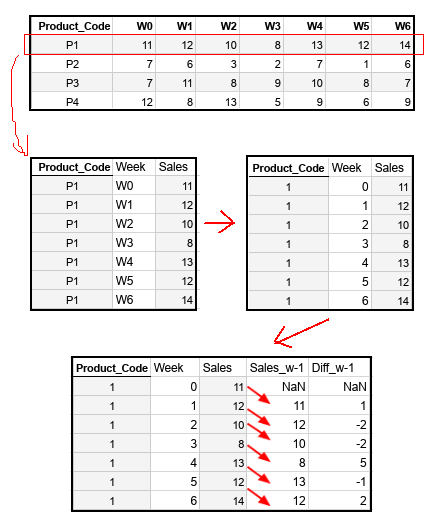

We will transform the dataset by transposing the weekly sales from the column to rows... 
After the transformations, we will add new data. This data will be obtained from the sales of the previous week and the difference between the current week sale and the previous week sales.

In [23]:
df1 = df.melt(id_vars='Product_Code', var_name='Week', value_name='Sales')
print(df1.dtypes)
df1.head()

Product_Code    object
Week            object
Sales            int64
dtype: object


,Product_Code,Week,Sales
0,P1,W0,11
1,P2,W0,7
2,P3,W0,7
3,P4,W0,12
4,P5,W0,8


In [24]:
df1['Product_Code'] = df1['Product_Code'].str.extract('(\d+)', expand=False).astype(int)
print(df1.dtypes)
df1.head()

Product_Code     int32
Week            object
Sales            int64
dtype: object


,Product_Code,Week,Sales
0,1,W0,11
1,2,W0,7
2,3,W0,7
3,4,W0,12
4,5,W0,8


In [25]:
df1['Week'] = df1['Week'].str.extract('(\d+)', expand=False).astype(int)
print(df1.dtypes)
df1.head()

Product_Code    int32
Week            int32
Sales           int64
dtype: object


,Product_Code,Week,Sales
0,1,0,11
1,2,0,7
2,3,0,7
3,4,0,12
4,5,0,8


In [26]:
df1 = df1.sort_values(['Week', 'Product_Code'])
df1.head()

,Product_Code,Week,Sales
0,1,0,11
1,2,0,7
2,3,0,7
3,4,0,12
4,5,0,8


In [27]:
df1.shape

(42172, 3)

In [28]:
print(df1)

       Product_Code  Week  Sales
0                 1     0     11
1                 2     0      7
2                 3     0      7
3                 4     0     12
4                 5     0      8
5                 6     0      3
6                 7     0      4
7                 8     0      8
8                 9     0     14
9                10     0     22
10               11     0     15
11               12     0      3
12               13     0     12
13               14     0     14
14               15     0     19
15               16     0     30
16               17     0     49
17               18     0     40
18               19     0     26
19               20     0     13
20               21     0     12
21               22     0      8
22               23     0      3
23               24     0     36
24               25     0     26
25               26     0     14
26               27     0     44
27               28     0     34
28               29     0     13
29        

In [29]:
df2 = df1.copy()
df2['Last_Week_Sales'] = df2.groupby(['Product_Code'])['Sales'].shift()
df2['Last_Week_Diff'] = df2.groupby(['Product_Code'])['Last_Week_Sales'].diff()
df2.head()

,Product_Code,Week,Sales,Last_Week_Sales,Last_Week_Diff
0,1,0,11,NaN,NaN
1,2,0,7,NaN,NaN
2,3,0,7,NaN,NaN
3,4,0,12,NaN,NaN
4,5,0,8,NaN,NaN


In [30]:
df2 = df2.dropna()
df2.head()

,Product_Code,Week,Sales,Last_Week_Sales,Last_Week_Diff
1622,1,2,10,12.0,1.0
1623,2,2,3,6.0,-1.0
1624,3,2,8,11.0,4.0
1625,4,2,13,8.0,-4.0
1626,5,2,13,5.0,-3.0


In [31]:
### defining the error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

def mae(ytrue, ypred):
return np.abs(mean_squared_log_error(ytrue, ypred))

In [32]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Now we will check the baseline error by putting the last week sale as the "prediction":

In [33]:
# train/dev[36,42], test[43,51]

mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    p = dev['Last_Week_Sales'].values
    
    error = rmsle(dev['Sales'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 36 - Error 0.52266
Week 37 - Error 0.52061
Week 38 - Error 0.50225
Week 39 - Error 0.50874
Week 40 - Error 0.51952
Week 41 - Error 0.51691
Mean Error = 0.51512


In [34]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    p = dev['Last_Week_Sales'].values
    
    error = mean_absolute_error(dev['Sales'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 36 - Error 2.59926
Week 37 - Error 2.71270
Week 38 - Error 2.51788
Week 39 - Error 2.50555
Week 40 - Error 2.59679
Week 41 - Error 2.61529
Mean Error = 2.59125


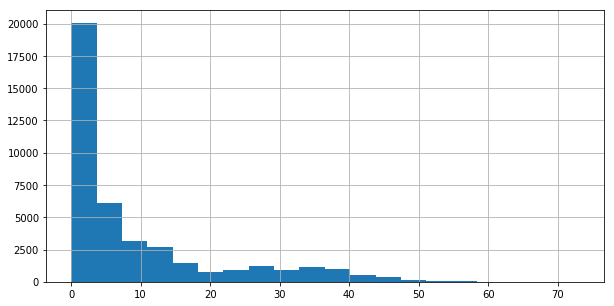

In [35]:
df2['Sales'].hist(bins=20, figsize=(10,5))

In [36]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    xtr, xts = train.drop(['Sales'], axis=1), dev.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, dev['Sales'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


Week 36 - Error 0.46897
Week 37 - Error 0.46669
Week 38 - Error 0.45113
Week 39 - Error 0.46696
Week 40 - Error 0.46242
Week 41 - Error 0.45964
Mean Error = 0.46264


In [37]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    xtr, xts = train.drop(['Sales'], axis=1), dev.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, dev['Sales'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = mean_absolute_error(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


Week 36 - Error 2.34354
Week 37 - Error 2.21070
Week 38 - Error 2.18356
Week 39 - Error 2.27209
Week 40 - Error 2.33951
Week 41 - Error 2.22099
Mean Error = 2.26173


In [38]:
df2['Last-1_Week_Sales'] = df2.groupby(['Product_Code'])['Sales'].shift(2)
df2['Last-1_Week_Diff'] = df2.groupby(['Product_Code'])['Last-1_Week_Sales'].diff()
df2 = df2.dropna()
df2.head()

,Product_Code,Week,Sales,Last_Week_Sales,Last_Week_Diff,Last-1_Week_Sales,Last-1_Week_Diff
4055,1,5,12,13.0,5.0,8.0,-2.0
4056,2,5,1,7.0,5.0,2.0,-1.0
4057,3,5,8,10.0,1.0,9.0,1.0
4058,4,5,6,9.0,4.0,5.0,-8.0
4059,5,5,7,6.0,-5.0,11.0,-2.0


In [39]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    xtr, xts = train.drop(['Sales'], axis=1), dev.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, dev['Sales'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = mean_absolute_error(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


Week 36 - Error 2.27234
Week 37 - Error 2.15341
Week 38 - Error 2.14185
Week 39 - Error 2.19618
Week 40 - Error 2.23644
Week 41 - Error 2.21033
Mean Error = 2.20176


In [40]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    xtr, xts = train.drop(['Sales'], axis=1), dev.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, dev['Sales'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, criterion='mae', n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = mean_absolute_error(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


KeyboardInterrupt: 

In [ ]:
mean_error = []
for week in range(36,42):
    train = df2[df2['Week'] < week]
    dev = df2[df2['Week'] == week]
    
    xtr, xts = train.drop(['Sales'], axis=1), dev.drop(['Sales'], axis=1)
    ytr, yts = train['Sales'].values, dev['Sales'].values
    
    mdl = GradientBoostingRegressor(n_estimators=100, criterion='mae', max_depth=5, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = mean_absolute_error(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))
